In [1]:
import pandas as pd
import sqlite3

%matplotlib inline

def run_query(q):
    with sqlite3.connect('chinook.db') as conn:
        return pd.read_sql(q, conn)
    
def run_command(q):
    with sqlite3.connect('chinook.db') as conn:
        conn.isolation_level = None
        conn.execute(q)

def show_tables():
    query = "SELECT name,type FROM sqlite_master "
    query+= "WHERE type IN ('table','view');"
        
    return run_query(query)
        

In [2]:
show_tables()

,name,type
0,album,table
1,artist,table
2,customer,table
3,employee,table
4,genre,table
5,invoice,table
6,invoice_line,table
7,media_type,table
8,playlist,table
9,playlist_track,table


In [3]:
query = "Select GR.name, SUM(INV.quantity) AS Vente, "
query+= "(Cast(SUM(INV.quantity) as float)) "
query+= "/ (cast((SELECT SUM(quantity) FROM Invoice_line) as float)) AS Ratio_vente "
query+= "FROM track as TR INNER JOIN Invoice_line AS INV "
query+= "ON TR.track_id = INV.track_id "
query+= "INNER JOIN Genre AS GR ON GR.genre_id = TR.genre_id "
query+= "GROUP BY GR.name"

data_genre = run_query(query)
data_genre

,name,Vente,Ratio_vente
0,Alternative,117,0.024595
1,Alternative & Punk,492,0.103427
2,Blues,124,0.026067
3,Classical,47,0.009880
4,Drama,1,0.000210
5,Easy Listening,74,0.015556
6,Electronica/Dance,55,0.011562
7,Heavy Metal,8,0.001682
8,Hip Hop/Rap,33,0.006937
9,Jazz,121,0.025436


In [4]:
data_genre_name = data_genre.set_index('name')

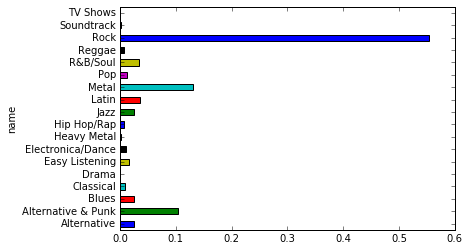

In [5]:
data_genre_name['Ratio_vente'].plot.barh()

In [6]:
query = "SELECT EMP.first_name || ' ' || EMP.last_name as employee_name,"
query+= "SUM(INV.total) AS total_vente "
query+=" FROM employee AS EMP INNER JOIN customer AS CUS "
query+=" ON EMP.employee_id = CUS.support_rep_id "
query+=" INNER JOIN Invoice AS INV ON INV.customer_id = CUS.customer_id "
query+=" GROUP BY EMP.employee_id"

data_employee = run_query(query)

In [7]:
data_employee

,employee_name,total_vente
0,Jane Peacock,1731.51
1,Margaret Park,1584.00
2,Steve Johnson,1393.92


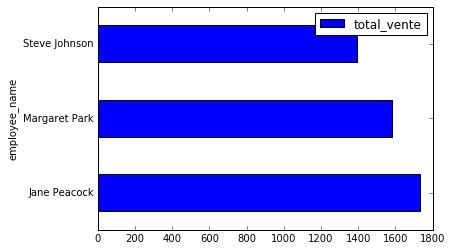

In [8]:
data_employee_name = data_employee.set_index('employee_name')
data_employee_name.plot.barh()

In [9]:
query0="drop view IF EXISTS Customer_Country "
run_command(query0)

query ="CREATE VIEW Customer_Country AS "
query+="SELECT CUST.*,"
query+="CASE WHEN VEN.Nb_Customer <= 1 THEN 'Other' ELSE VEN.country END AS New_Country "
query+="FROM customer AS CUST INNER JOIN " 
query+="(SELECT CUS.country,"
query+="COUNT(Distinct CUS.customer_id) AS Nb_Customer "
query+="FROM customer AS CUS INNER JOIN Invoice AS INVO "
query+="ON CUS.customer_id = INVO.customer_id "
query+="GROUP BY CUS.country) AS VEN "
query+="ON CUST.country = VEN.country"

run_command(query)

In [10]:
query1 = "SELECT * FROM Customer_Country"
run_query(query1)

,customer_id,first_name,last_name,company,address,city,state,country,postal_code,phone,fax,email,support_rep_id,New_Country
0,1,Luís,Gonçalves,Embraer - Empresa Brasileira de Aeronáutica S.A.,"Av. Brigadeiro Faria Lima, 2170",São José dos Campos,SP,Brazil,12227-000,+55 (12) 3923-5555,+55 (12) 3923-5566,luisg@embraer.com.br,3,Brazil
1,2,Leonie,Köhler,None,Theodor-Heuss-Straße 34,Stuttgart,None,Germany,70174,+49 0711 2842222,None,leonekohler@surfeu.de,5,Germany
2,3,François,Tremblay,None,1498 rue Bélanger,Montréal,QC,Canada,H2G 1A7,+1 (514) 721-4711,None,ftremblay@gmail.com,3,Canada
3,4,Bjørn,Hansen,None,Ullevålsveien 14,Oslo,None,Norway,0171,+47 22 44 22 22,None,bjorn.hansen@yahoo.no,4,Other
4,5,František,Wichterlová,JetBrains s.r.o.,Klanova 9/506,Prague,None,Czech Republic,14700,+420 2 4172 5555,+420 2 4172 5555,frantisekw@jetbrains.com,4,Czech Republic
5,6,Helena,Holý,None,Rilská 3174/6,Prague,None,Czech Republic,14300,+420 2 4177 0449,None,hholy@gmail.com,5,Czech Republic
6,7,Astrid,Gruber,None,"Rotenturmstraße 4, 1010 Innere Stadt",Vienne,None,Austria,1010,+43 01 5134505,None,astrid.gruber@apple.at,5,Other
7,8,Daan,Peeters,None,Grétrystraat 63,Brussels,None,Belgium,1000,+32 02 219 03 03,None,daan_peeters@apple.be,4,Other
8,9,Kara,Nielsen,None,Sønder Boulevard 51,Copenhagen,None,Denmark,1720,+453 3331 9991,None,kara.nielsen@jubii.dk,4,Other
9,10,Eduardo,Martins,Woodstock Discos,"Rua Dr. Falcão Filho, 155",São Paulo,SP,Brazil,01007-010,+55 (11) 3033-5446,+55 (11) 3033-4564,eduardo@woodstock.com.br,4,Brazil


In [22]:
query="SELECT CUS.new_country,"
query+="count(CUS.customer_id) AS total_number_customers,"
query+="SUM(INVO.total) AS total_value_sales,"
query+="count(distinct CUS.customer_id) AS unique_consumers,"
query+="count(CUS.customer_id) / count(distinct CUS.customer_id) AS average_number_sales,"
query+="SUM(INVO.total)/count(distinct CUS.customer_id) AS average_purchase "
query+="FROM Customer_Country AS CUS INNER JOIN Invoice AS INVO "
query+="ON CUS.customer_id = INVO.customer_id "
query+="GROUP BY CUS.new_country "
query+="ORDER BY total_value_sales DESC"

run_query(query)


,New_Country,total_number_customers,total_value_sales,unique_consumers,average_number_sales,average_purchase
0,Other,147,1094.94,15,9,72.996000
1,USA,131,1040.49,13,10,80.037692
2,Canada,76,535.59,8,9,66.948750
3,Brazil,61,427.68,5,12,85.536000
4,France,50,389.07,5,10,77.814000
5,Germany,41,334.62,4,10,83.655000
6,Czech Republic,30,273.24,2,15,136.620000
7,United Kingdom,28,245.52,3,9,81.840000
8,Portugal,29,185.13,2,14,92.565000
9,India,21,183.15,2,10,91.575000


In [23]:
sales = run_query(query)

In [26]:
sales_index = sales.set_index('New_Country')

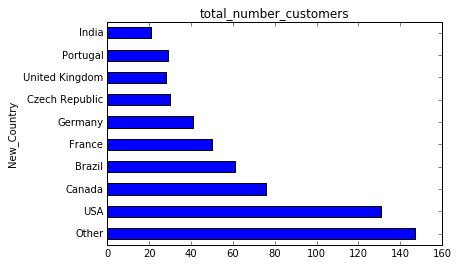

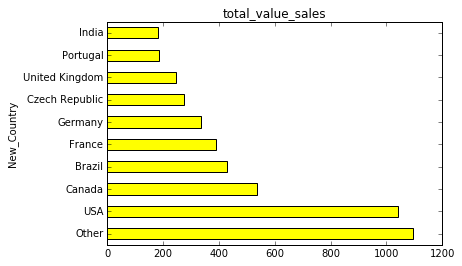

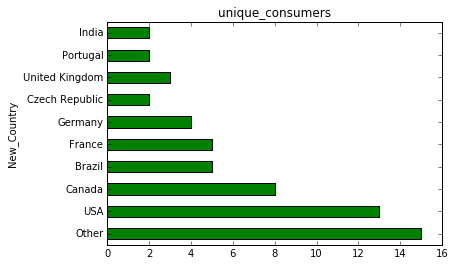

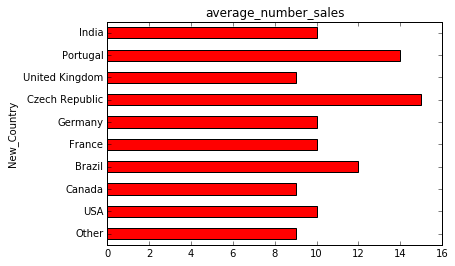

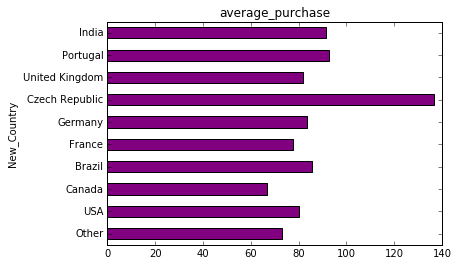

In [43]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(20,20))
%matplotlib inline

kpi = ['total_number_customers','total_value_sales','unique_consumers','average_number_sales','average_purchase']
color=['blue','yellow','green','red','purple']

for k,c in zip(kpi,color):
        sales_index[k].plot.barh(title=k,color=c)
        plt.show()

        

In [8]:
query= "WITH first_track AS ("
query+="SELECT invoice_id,"
query+="MIN(track_id) AS first_track_id "
query+="FROM invoice_line "
query+="GROUP BY invoice_id) "


In [17]:
query_ = query
query_+="SELECT album_purchase,"
query_+="COUNT(invoice_id) AS number_invoices,"
query_+="cast(count(invoice_id) as float) / "
query_+="(cast((select count(*) from invoice) as float)) as Percent "
query_+="FROM ("
query_+="SELECT IFS.*,"
query_+="CASE WHEN ("
query_+="SELECT t.track_id FROM track as T "
query_+="WHERE t.album_id = ("
query_+="SELECT T2.album_id FROM track AS T2 "
query_+="WHERE T2.track_id = IFS.first_track_id) "
query_+="EXCEPT "
query_+="SELECT IL2.track_id FROM invoice_line as IL2 "
query_+="WHERE IL2.invoice_id = IFS.invoice_id) "
query_+="IS NULL"
query_+="AND "
query_+="(SELECT IL2.track_id FROM invoice_line as IL2 "
query_+="WHERE IL2.invoice_id = IFS.invoice_id "
query_+="EXCEPT "
query_+="SELECT t.track_id FROM track as T "
query_+="WHERE t.album_id = ("
query_+="SELECT T2.album_id FROM track AS T2 "
query_+="WHERE T2.track_id = IFS.first_track_id) "
query_+=") IS NULL THEN 'Yes' ELSE 'No' END AS Album_Purchase "
query_+="FROM first_track AS IFS) "
query_+="GROUP BY Album_Purchase"

In [18]:
query_

"WITH first_track AS (SELECT invoice_id,MIN(track_id) AS first_track_id FROM invoice_line GROUP BY invoice_id) SELECT album_purchase,COUNT(invoice_id) AS number_invoices,cast(count(invoice_id) as float) / (cast((select count(*) from invoice) as float)) as Percent FROM (SELECT IFS.*,CASE WHEN (SELECT t.track_id FROM track as T WHERE t.album_id = (SELECT T2.album_id FROM track AS T2 WHERE T2.track_id = IFS.first_track_id) EXCEPT SELECT IL2.track_id FROM invoice_line as IL2 WHERE IL2.invoice_id = IFS.invoice_id) IS NULLAND (SELECT IL2.track_id FROM invoice_line as IL2 WHERE IL2.invoice_id = IFS.invoice_id EXCEPT SELECT t.track_id FROM track as T WHERE t.album_id = (SELECT T2.album_id FROM track AS T2 WHERE T2.track_id = IFS.first_track_id) ) IS NULL THEN 'Yes' ELSE 'No' END AS Album_Purchase FROM first_track AS IFS) GROUP BY Album_Purchase"

In [20]:
albums_vs_tracks = '''
WITH invoice_first_track AS
    (
     SELECT
         il.invoice_id invoice_id,
         MIN(il.track_id) first_track_id
     FROM invoice_line il
     GROUP BY 1
    )

SELECT
    album_purchase,
    COUNT(invoice_id) number_of_invoices,
    CAST(count(invoice_id) AS FLOAT) / (
                                         SELECT COUNT(*) FROM invoice
                                      ) percent
FROM
    (
    SELECT
        ifs.*,
        CASE
            WHEN
                 (
                  SELECT t.track_id FROM track t
                  WHERE t.album_id = (
                                      SELECT t2.album_id FROM track t2
                                      WHERE t2.track_id = ifs.first_track_id
                                     ) 

                  EXCEPT 

                  SELECT il2.track_id FROM invoice_line il2
                  WHERE il2.invoice_id = ifs.invoice_id
                 ) IS NULL
             AND
                 (
                  SELECT il2.track_id FROM invoice_line il2
                  WHERE il2.invoice_id = ifs.invoice_id

                  EXCEPT 

                  SELECT t.track_id FROM track t
                  WHERE t.album_id = (
                                      SELECT t2.album_id FROM track t2
                                      WHERE t2.track_id = ifs.first_track_id
                                     ) 
                 ) IS NULL
             THEN "yes"
             ELSE "no"
         END AS "album_purchase"
     FROM invoice_first_track ifs
    )
GROUP BY album_purchase;
'''

In [21]:
run_query(albums_vs_tracks)

,album_purchase,number_of_invoices,percent
0,no,500,0.814332
1,yes,114,0.185668
